In [1]:
import csv
data_lists = {}
i = 0
with open('ExperimentRunner/src/hcg-experiment8_2_1.csv', 'rb') as f:
    reader = csv.reader(f)
    for row in reader:
        data_lists[i] = list(row)
        i=i+1

# print data_lists
timesteps = {}
events = {}
s = {}
e = {}
i = {}
d = {}
r = {}
dr = {}
k = 0
for j in data_lists:
    if j%8==0:
        timesteps[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
    if j%8==1:
        events[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
    if j%8==2:
        s[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
    if j%8==3:
        e[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
    if j%8==4:
        i[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
    if j%8==5:
        d[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
    if j%8==6:
        r[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
    if j%8==7:
        dr[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
        k=k+1
        
max_time = 0
for j in timesteps:
    local_max = max(timesteps[j])
    if local_max>max_time:
        max_time = local_max

for j in timesteps:
    index = 0
    local_s = [0]*(max_time+1)
    local_e = [0]*(max_time+1)
    local_i = [0]*(max_time+1)
    local_d = [0]*(max_time+1)
    local_r = [0]*(max_time+1)
    local_dr = [0]*(max_time+1)
    last_value_s = s[j][0]
    last_value_e = e[j][0]
    last_value_i = i[j][0]
    last_value_d = d[j][0]
    last_value_r = r[j][0]
    last_value_dr = dr[j][0]
    for m in range(0, max_time+1):
        if index<len(timesteps[j]) and timesteps[j][index]==m:
            local_s[m] = s[j][index]
            last_value_s = s[j][index]
            local_e[m] = e[j][index]
            last_value_e = e[j][index]
            local_i[m] = i[j][index]
            last_value_i = i[j][index]
            local_d[m] = d[j][index]
            last_value_d = d[j][index]
            local_r[m] = r[j][index]
            last_value_r = r[j][index]
            local_dr[m] = dr[j][index]
            last_value_dr = dr[j][index]
            index=index+1
        else:
            local_s[m] = last_value_s
            local_e[m] = last_value_e
            local_i[m] = last_value_i
            local_d[m] = last_value_d
            local_r[m] = last_value_r
            local_dr[m] = last_value_dr
    s[j] = local_s
    e[j] = local_e
    i[j] = local_i
    d[j] = local_d
    r[j] = local_r
    dr[j] = local_dr
    


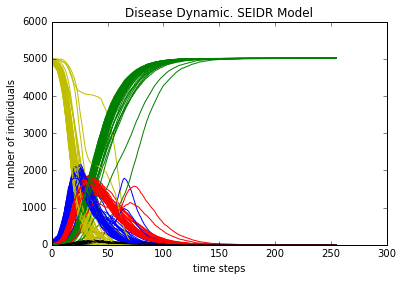

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
rdr = {}
plots = {}
index = 0
for j in s:
    plots[index] = plt.plot(range(0,max_time+1), s[j], 'y-', label='susceptible')
    index=index+1
    plots[index] = plt.plot(range(0,max_time+1), e[j], 'b-', label='exposed')
    index=index+1
    plots[index] = plt.plot(range(0,max_time+1), i[j], 'r-', label='infected')
    index=index+1
    plots[index] = plt.plot(range(0,max_time+1), d[j], 'k-', label='dead')
    index=index+1
    rdr[j] = [x + y for x, y in zip(r[j], dr[j])]
    plots[index] = plt.plot(range(0,max_time+1), rdr[j], 'g-', label='removed')
    index=index+1
plt.title('Disease Dynamic. SEIDR Model')
plt.xlabel('time steps')
plt.ylabel('number of individuals')
# plt.legend([plots[index] for index in plots if index<6],['susceptible','exposed', 'infected', 'dead', 'removed'])


In [3]:
s_average = [0]*(max_time+1)
e_average = [0]*(max_time+1)
i_average = [0]*(max_time+1)
d_average = [0]*(max_time+1)
rdr_average = [0]*(max_time+1)
num_of_experiments = len(s)
for m in range(0, max_time+1):
    local_sum_s = 0
    local_sum_e = 0
    local_sum_i = 0
    local_sum_d = 0
    local_sum_rdr = 0
    for j in s:
        local_sum_s=local_sum_s+s[j][m]
        local_sum_e=local_sum_e+e[j][m]
        local_sum_i=local_sum_i+i[j][m]
        local_sum_d=local_sum_d+d[j][m]
        local_sum_rdr=local_sum_rdr+rdr[j][m]
    s_average[m]=(local_sum_s+0.0)/num_of_experiments
    e_average[m]=(local_sum_e+0.0)/num_of_experiments
    i_average[m]=(local_sum_i+0.0)/num_of_experiments
    d_average[m]=(local_sum_d+0.0)/num_of_experiments
    rdr_average[m]=(local_sum_rdr+0.0)/num_of_experiments

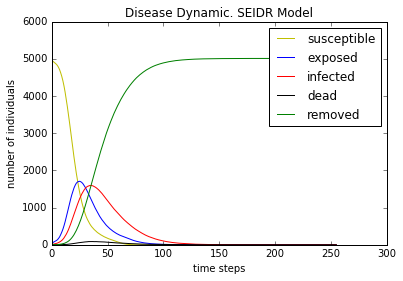

In [4]:
plt.plot(range(0,max_time+1), s_average, 'y-',label='susceptible')
plt.plot(range(0,max_time+1), e_average, 'b-',label='exposed')
plt.plot(range(0,max_time+1), i_average, 'r-',label='infected')
plt.plot(range(0,max_time+1), d_average, 'k-',label='dead')
plt.plot(range(0,max_time+1), rdr_average, 'g-',label='removed')
plt.title('Disease Dynamic. SEIDR Model')
plt.xlabel('time steps')
plt.ylabel('number of individuals')
plt.legend(loc = 'upper right')

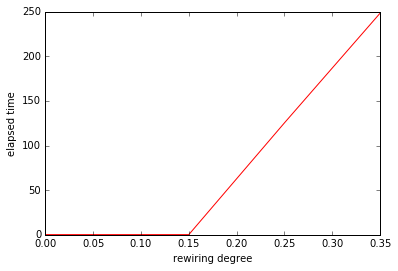

In [5]:
r_degree = [0.0,0.15,0.25,0.35]
el_time = [0.2, 0.2, 125.41510986, 248.259244]
plt.plot(r_degree, el_time, 'r-')
plt.xlabel('rewiring degree')
plt.ylabel('elapsed time')
plt.savefig('r_degree_time.png')
_ = plt.show()